# loan approval prediction usinf first logistic regression then enhancing the model using SMOTE blancing technique then use decision tree model and compare the results

---



In [ ]:
# mount google drive to load the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip the dataset
!unzip "/content/drive/MyDrive/loan-approval-prediction-dataset.zip" -d "/content/loan-approval-prediction-dataset"

Archive:  /content/drive/MyDrive/loan-approval-prediction-dataset.zip
  inflating: /content/loan-approval-prediction-dataset/loan_approval_dataset.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#load the data
df = pd.read_csv("/content/loan-approval-prediction-dataset/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#Explore Data
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

df.describe()

Dataset shape: (4269, 13)

Missing values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Data Types:
 loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
#drop the loan_id
if "loan_id" in df.columns:
    df = df.drop("loan_id", axis=1)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**check if there is any missing values (NaaN) in the dataset before
continuing**

---



In [ ]:
# Number of rows and columns
print("Shape of dataset:", df.shape)

# Total number of rows
print("Total rows:", len(df))

# Quick classification of dataset size
if len(df) < 10000:
    print("➡ This is a SMALL dataset (< 10,000 rows). Prefer FILLING missing values.")
else:
    print("➡ This is a LARGE dataset (>= 10,000 rows). Dropping rows may be acceptable.")
# Count of missing values per column
print("\nMissing values count per column:")
print(df.isnull().sum())

# Percentage of missing values per column
print("\nMissing values percentage per column:")
print((df.isnull().sum() / len(df)) * 100)

# Quick summary
total_missing = df.isnull().sum().sum()
missing_percentage = (total_missing / (df.shape[0] * df.shape[1])) * 100

print(f"\nTotal missing values in dataset: {total_missing}")
print(f"Overall missing percentage: {missing_percentage:.2f}%")

Shape of dataset: (4269, 12)
Total rows: 4269
➡ This is a SMALL dataset (< 10,000 rows). Prefer FILLING missing values.

Missing values count per column:
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Missing values percentage per column:
no_of_dependents            0.0
education                   0.0
self_employed               0.0
income_annum                0.0
loan_amount                 0.0
loan_term                   0.0
cibil_score                 0.0
residential_assets_value    0.0
commercial_assets_value     0.0
luxury_assets_value         0.0
bank_asset_value            0.0
loan_status                 0.0
dtype: float64

Total missing values in dataset: 0

since there is not any missing values we could proceed to encoding

In [ ]:
#encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [ ]:
#select the features and labels
X = df.drop(" loan_status", axis=1) #features
y = df[" loan_status"]              #labels

In [ ]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set:", X_train.shape, "Testing set:", X_test.shape)

Training set: (3415, 11) Testing set: (854, 11)


In [ ]:
#scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## First: logistic regression

---



In [ ]:
#select the model and balance the data using (class_weight="balanced")
model = LogisticRegression(random_state=42, class_weight="balanced", max_iter=1000)

In [ ]:
#train the model
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
#test the model
y_pred = model.predict(X_test)

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.93      0.92       323

    accuracy                           0.94       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.94      0.94      0.94       854



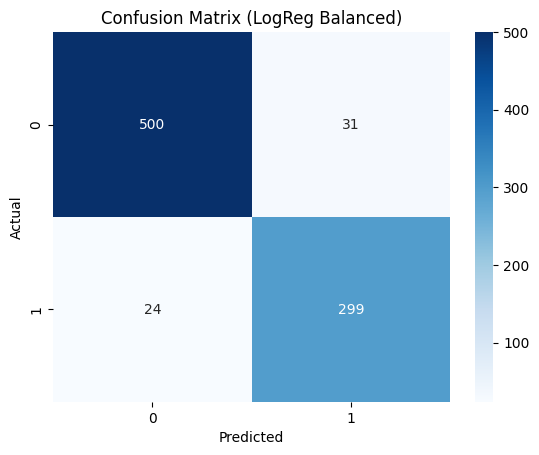

In [ ]:
#evaluate the model performance
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (LogReg Balanced)")
plt.show()

**the model performance is actually so good giving accuracy of 94% but lets try to use SMOTE balancing technique**

## Second: using SMOTE balancing technique

---



In [ ]:
#loading the library of SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
#Apply SMOTE balancing technique
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", y.value_counts().to_dict())
print("Balanced dataset shape:", y_resampled.value_counts().to_dict())

Original dataset shape: {0: 2656, 1: 1613}
Balanced dataset shape: {0: 2656, 1: 2656}


In [ ]:
#split the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [ ]:
#train the model
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#test the model
y_pred_smote = model_smote.predict(X_test)

In [ ]:
#evaluate the model
print("\nClassification Report (Logistic Regression + SMOTE):\n")
print(classification_report(y_test, y_pred_smote))


Classification Report (Logistic Regression + SMOTE):

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       532
           1       0.81      0.67      0.73       531

    accuracy                           0.76      1063
   macro avg       0.76      0.76      0.75      1063
weighted avg       0.76      0.76      0.75      1063





---


## Note on SMOTE Results

- **Before SMOTE (Imbalanced Dataset):**
  - Accuracy looked very high (~94%).
  - Model biased toward the majority class (Loan Denied).
  - Performance for the minority class (Loan Approved) was weaker.

- **After SMOTE (Balanced Dataset):**
  - Accuracy dropped (~76%), since the model can no longer "cheat" by favoring the majority class.
  - Precision and recall are more balanced between classes.
  - Provides a more realistic measure of model performance in real-world loan prediction.

**Conclusion:**  
Accuracy alone is misleading with imbalanced datasets.  
SMOTE reveals the true challenge by balancing the data, giving a fairer evaluation of

---



## Third: decision trees

---



In [ ]:
#import the model library
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#load the model
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
#train the model on the SMOTE dataset
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#test the model
y_pred_dt = dt_model.predict(X_test)

Classification Report (Decision Tree + SMOTE):

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       532
           1       0.98      0.99      0.98       531

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063



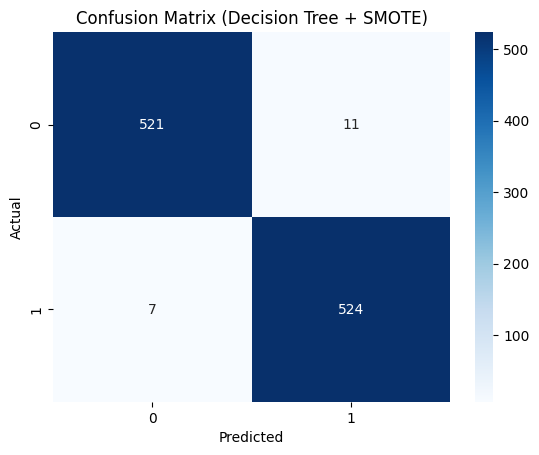

In [ ]:
#evaluate the model
print("Classification Report (Decision Tree + SMOTE):\n")
print(classification_report(y_test, y_pred_dt))

#plot the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree + SMOTE)")
plt.show()

this high accurace gives a sign of probability of ocurring an overfitting and we must check if the model is overfiting or has a good fit by using the cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Accuracy on training data
train_acc = accuracy_score(y_train, dt_model.predict(X_train))

#Accuracy on test data
test_acc = accuracy_score(y_test, dt_model.predict(X_test))

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

#Cross-validation on the resampled dataset
cv_scores = cross_val_score(dt_model, X_test, y_test, cv=5, scoring='accuracy')  # 5-fold CV

print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Std CV Accuracy:", cv_scores.std())

Training Accuracy: 1.0
Test Accuracy: 0.9830667920978363

Cross-Validation Scores: [0.97652582 0.99061033 0.97652582 0.96698113 0.98584906]
Mean CV Accuracy: 0.9792984321020463
Std CV Accuracy: 0.00822143907831754


Test Accuracy < Training Accuracy but, we should also visualize the fitting curve to double check the model fitting performance

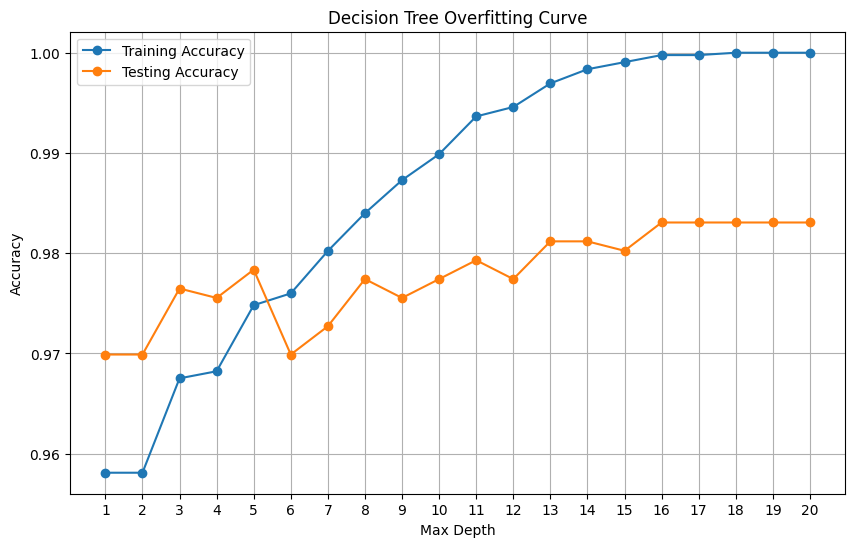

In [ ]:
#plot the overfitting curve
train_accuracies = []
test_accuracies = []
depths = range(1, 21) # Checking depths from 1 to 20

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(depths, test_accuracies, marker='o', label='Testing Accuracy')
plt.title('Decision Tree Overfitting Curve')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()

## let us now compare the models performance

---



In [ ]:
#compare the models performance
results = {
    "Phase": ["Logistic Regression", "Logistic Regression + SMOTE", "Decision Tree + SMOTE"],
    "Accuracy": [0.94, 0.76, 0.98],
    "F1-score (Class 1)": [0.92, 0.73, 0.98],
    "F1-score (Overall)": [0.94, 0.75, 0.98]
    }

# Convert to DataFrame
comparison_df = pd.DataFrame(results)

# Display as table
comparison_df

,Phase,Accuracy,F1-score (Class 1),F1-score (Overall)
0,Logistic Regression,0.94,0.92,0.94
1,Logistic Regression + SMOTE,0.76,0.73,0.75
2,Decision Tree + SMOTE,0.98,0.98,0.98


# Appearing clearly that the model having the best peformance is the decision tree after applying SMOTE balancing technique to it.

---

